In [1]:
import sys
sys.path.append('C:\\SET.IIT\\V\\p\\ddf_p\\ddf_p')


import numpy as np
import scipy.sparse as sps
import porepy as pp

import ddf.common as co
import ddf.hrl as hrl

from ddf.plot import quiver, plot_cells, streamplot
from ddf.immagini import *

from tabulate import tabulate

In [2]:
# def run(nome, adaptive_kwargs, vg14_args, impostazioni={}):
#     print(nome, end=' ')
# Ra_1 = 9.988363636363633 # 0.7*0.1*10*1.6e-16*9.81*1000/(0.1*1e-9*1.1e-3)
# Ra_c = 4*np.pi**2

def run(numero, km, krel):
    pbs = []
    tab = []
    
    for i,kf in enumerate(krel):
        imp = dict(
            cartella='../simulazioni/U', nome=f'a{i}',
            parla=1, scalari_post=[ hrl.dizionario_post['sherwood'] ], esporta=1
        )
        
        mdg, dati = hrl.vg14('U', numero, 0.25)
        
        
        dati['permeabilita_matrice'] = km
        dati['apertura'] = 1e-4
        dati['permeabilita_fratture'] = kf
        
        pb = hrl.HRL(mdg, dati, imp)
        pb.init()
        pb.steady_state()
        
        eig = pb.eig(post=0, k=5, tol=1e-8, ks=1)
        print(f'({eig.matvec_count}) ', eig.vals)
        
        # pb.perturba_cella()
        # pb.adaptive(dt_init=0.01, dt_max=0.1)
        # pb.steady_state()

        tab.append({ 'km': km, 'kf': kf, 'Ra': pb.car['Ra'] } | { f'l{i+1}': eig.vals[i] for i in range(5) })
        pbs.append(pb)

    return pbs, tab

In [11]:
def peig(pbs):
    fig,axs = plt.subplots(len(pbs), 5, figsize=(linewidth, linewidth/5/2*len(pbs)))
    for i,pb in enumerate(pbs):
        for j in range(5):
            ax = axs[i,j]
            norm = np.linalg.norm(pb._eig.funs[:,j], np.inf)
            plot_cells( pb, pb._eig.funs[:,j], ax=ax, cmap=cmap_dw, vmin=-norm, vmax=norm, fratture_lw=1 )
            bbox = dict(facecolor='white', boxstyle='square,pad=0.3', edgecolor='black')
            ax.text(20, 0.5, r'$ \lambda_{%d} = %.2f $' % (j+1, pb._eig.vals[j]), fontsize='x-small', ha='right', bbox=bbox)
    
    fig.tight_layout(pad=0.3)
    return fig,axs

In [4]:
tab_a = []

In [5]:
K_cr = 6.329205227151492e-16
pbs, tab = run(1, K_cr*1.1, K_cr*1.1 * np.logspace(-3, -8, 6))
tab_a += [ { 'scenario': 'A' } | row for row in tab ]

(173)  [  1.75435444  -2.34836454  -3.68837633  -9.83781454 -14.76160844]
(173)  [  1.02320157  -3.52131348  -4.27316716  -9.83781468 -16.88615586]
(174)  [ -2.88581689  -3.64334442  -9.76721561  -9.83781449 -21.66351173]
(174)  [ -3.65131787  -7.94514691  -9.83781447 -12.69941787 -23.47280074]
(174)  [ -3.65215124  -9.13690927  -9.83781448 -13.11848514 -23.72701064]
(174)  [ -3.65223506  -9.27217864  -9.83781448 -13.16216975 -23.75397143]


In [7]:
plt.rc('text', usetex=True)

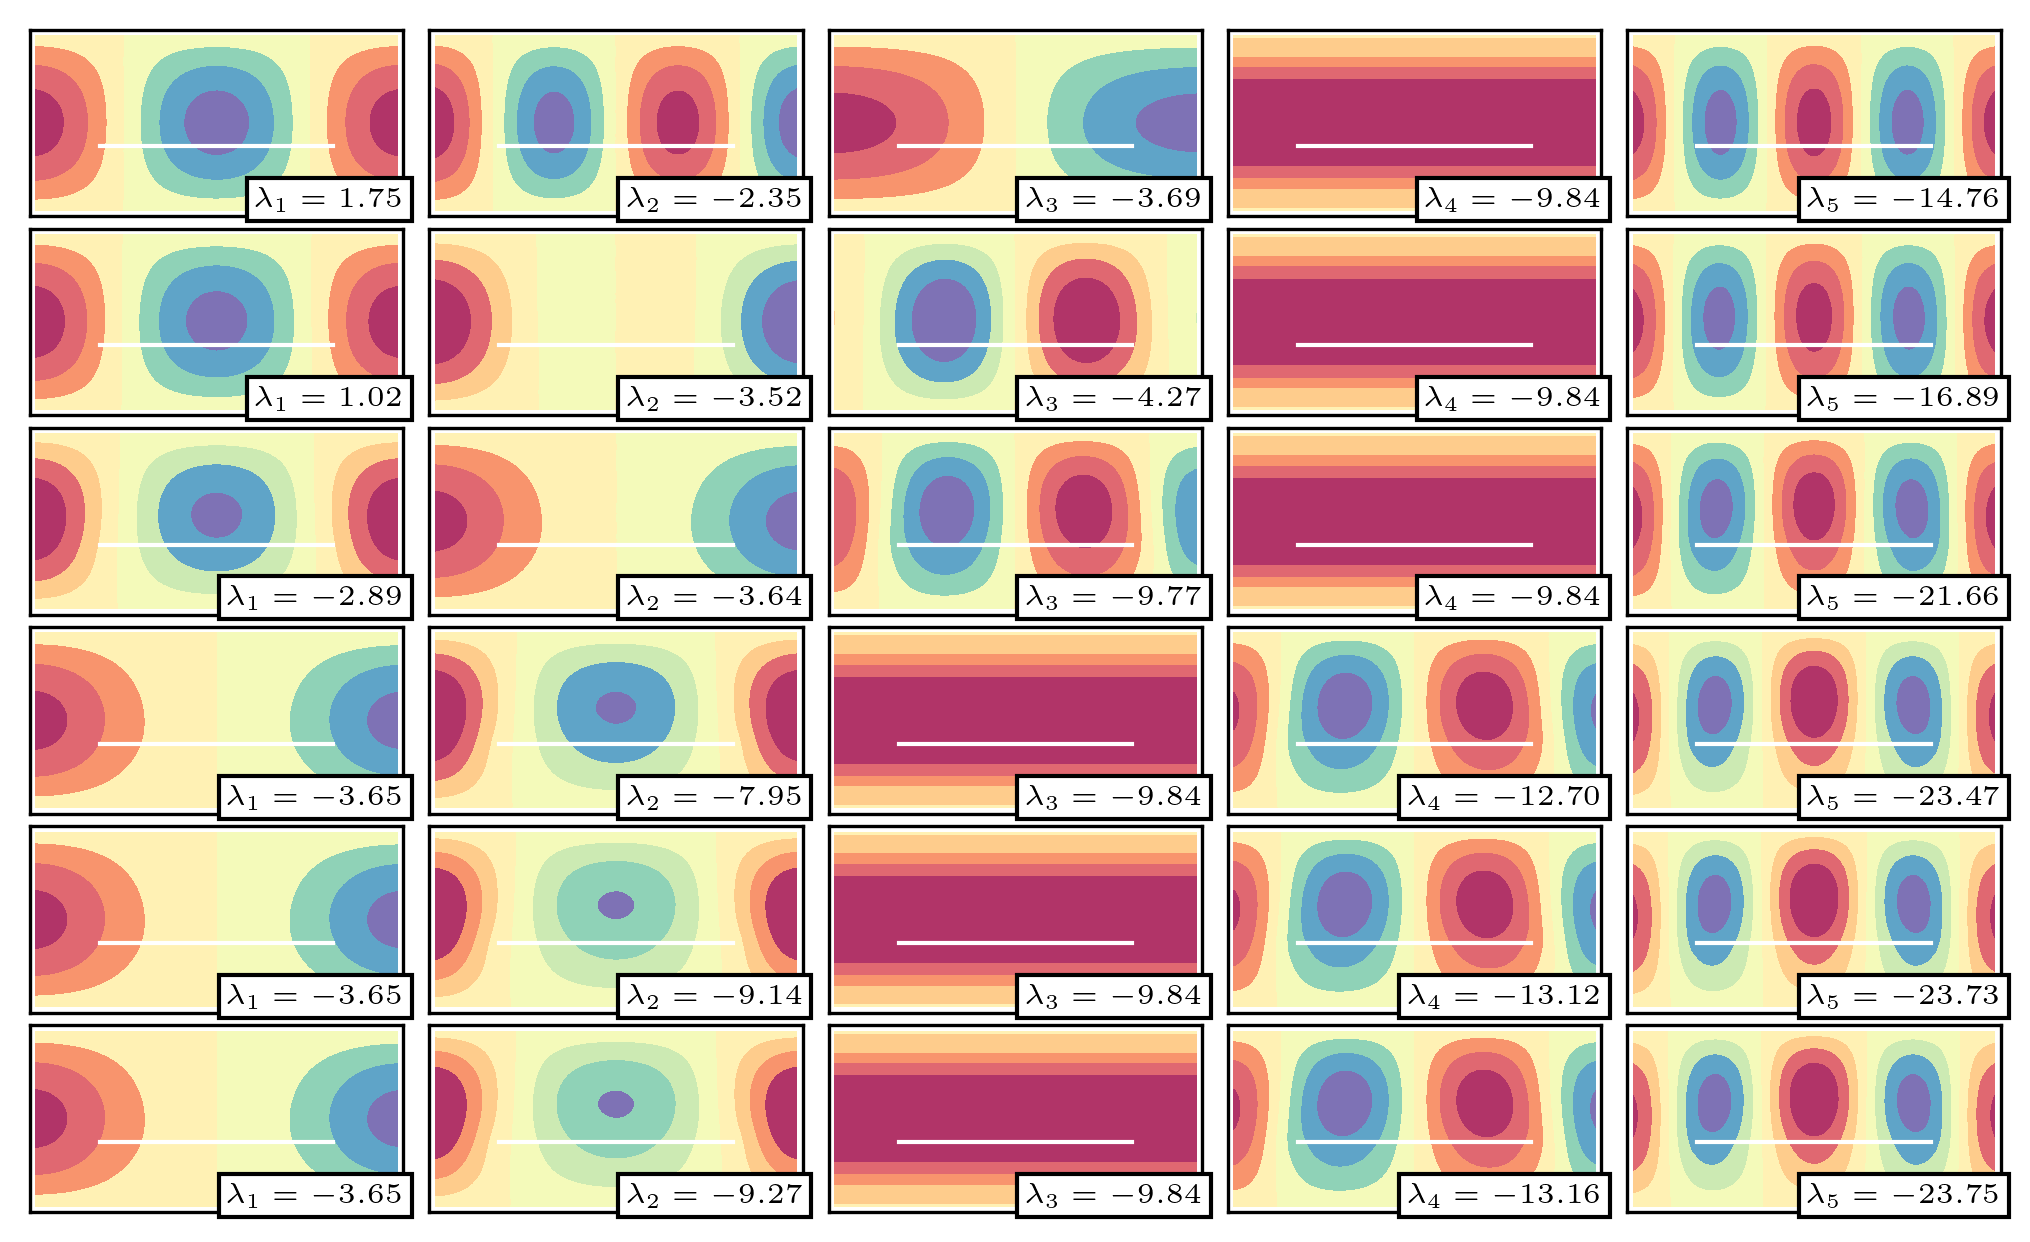

In [8]:
fig,axs = peig(pbs)
fig.savefig('../immagini/eig_bloccanti_A.png', **sf_kw|dict(pad_inches=0.05))

In [9]:
K_cr = 6.329205227151492e-16
pbs, tab = run(1, K_cr*2, K_cr*2 * np.logspace(-3, -8, 6))
tab_a += [ { 'scenario': 'B' } | row for row in tab ]

(174)  [21.81631683 19.29037268 13.09671888  3.3622139  -3.59442276]
(170)  [18.82625477 18.04625313  9.25390502  3.21517521 -7.22788826]
(173)  [11.63668898 10.54186896  2.20000992  0.88032819 -9.83781448]
(174)  [ 7.64723608  4.86437336  0.85498647 -3.76838105 -9.83781448]
(193)  [ 7.34857755  3.7495307   0.59348733 -4.98085437 -9.83781447]
(193)  [ 7.31907923  3.63627868  0.56529323 -5.12566473 -9.83781447]


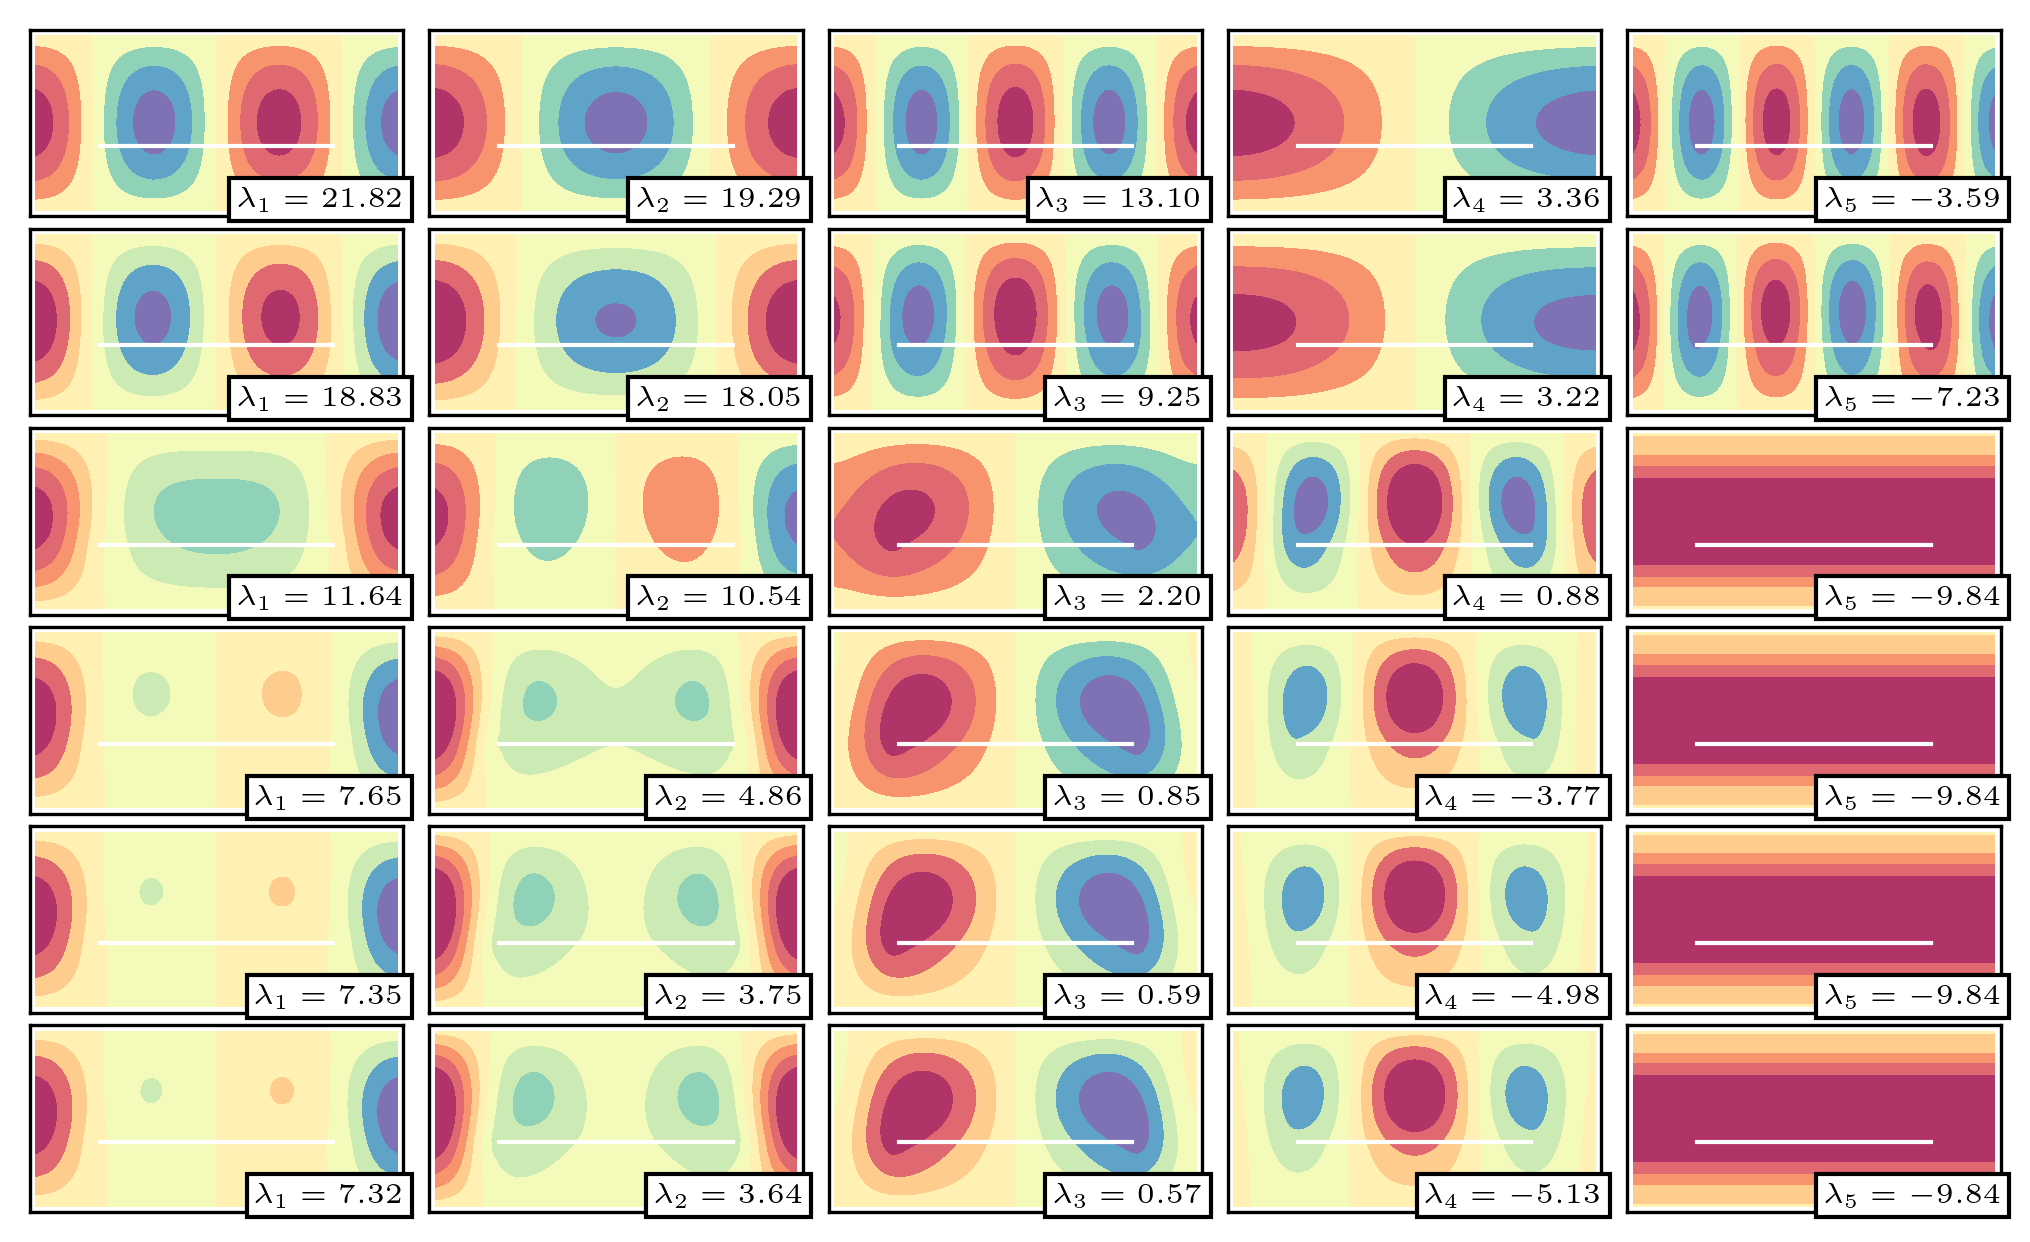

In [10]:
fig,axs = peig(pbs)
fig.savefig('../immagini/eig_bloccanti_B.png', **sf_kw|dict(pad_inches=0.05))

In [14]:
pb

In [19]:
[pbs[0], pbs[2], pbs[5]]

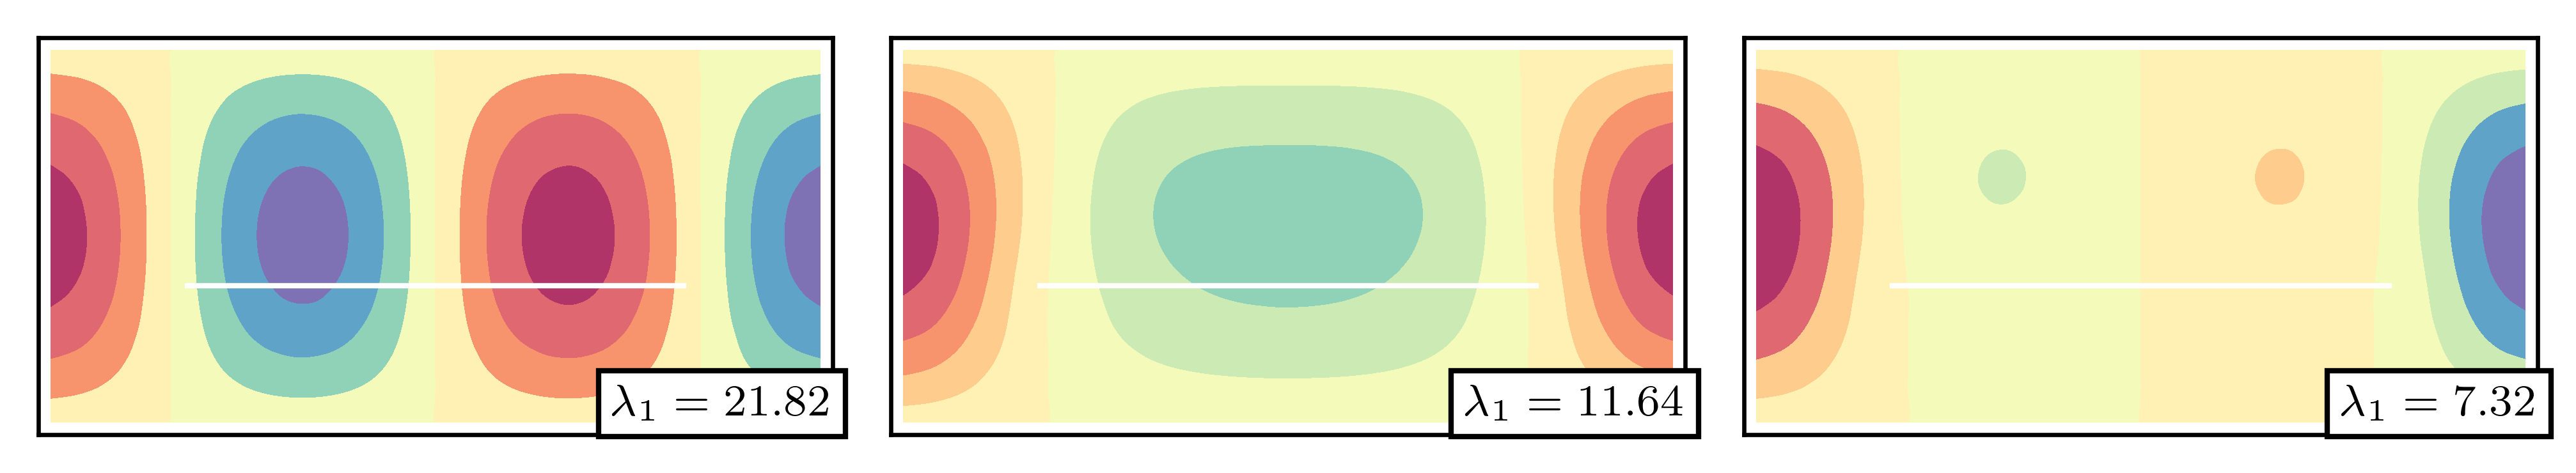

In [22]:
fig,axs = plt.subplots(1, 3, figsize=(linewidth, linewidth/3/2))
for i,pb in enumerate([pbs[0], pbs[2], pbs[5]]):
    j = 0
    ax = axs[i]
    norm = np.linalg.norm(pb._eig.funs[:,j], np.inf)
    plot_cells( pb, pb._eig.funs[:,j], ax=ax, cmap=cmap_dw, vmin=-norm, vmax=norm, fratture_lw=1 )
    bbox = dict(facecolor='white', boxstyle='square,pad=0.3', edgecolor='black')
    ax.text(20, 0.5, r'$ \lambda_{%d} = %.2f $' % (j+1, pb._eig.vals[j]), fontsize='small', ha='right', bbox=bbox)

fig.tight_layout(pad=0.3)
fig.savefig('../immagini/eig_bloccanti_paper.png', **sf_kw|dict(pad_inches=0.05))

In [9]:
K_cr = 6.329205227151492e-16
pbs, tab = run(2, K_cr*2, K_cr*2 * np.logspace(-3, -8, 6))
tab_a += [ { 'scenario': 'C' } | row for row in tab ]

(290)  [21.4870809  19.10263047 12.63966191  3.33442048 -4.14150484]
(271)  [18.07001546 15.04215456  6.15877499  2.94186628 -9.83771698]
(299)  [10.86059936  1.06692413  0.57747992 -9.0504146  -9.83771665]
(310)  [  6.05698621  -2.46025812  -8.3624255   -9.83771691 -16.45241562]
(310)  [  5.23896893  -3.16075164  -9.8377169  -10.76188058 -17.64778662]
(310)  [  5.14947345  -3.24287427  -9.8377169  -11.04142277 -17.78366199]


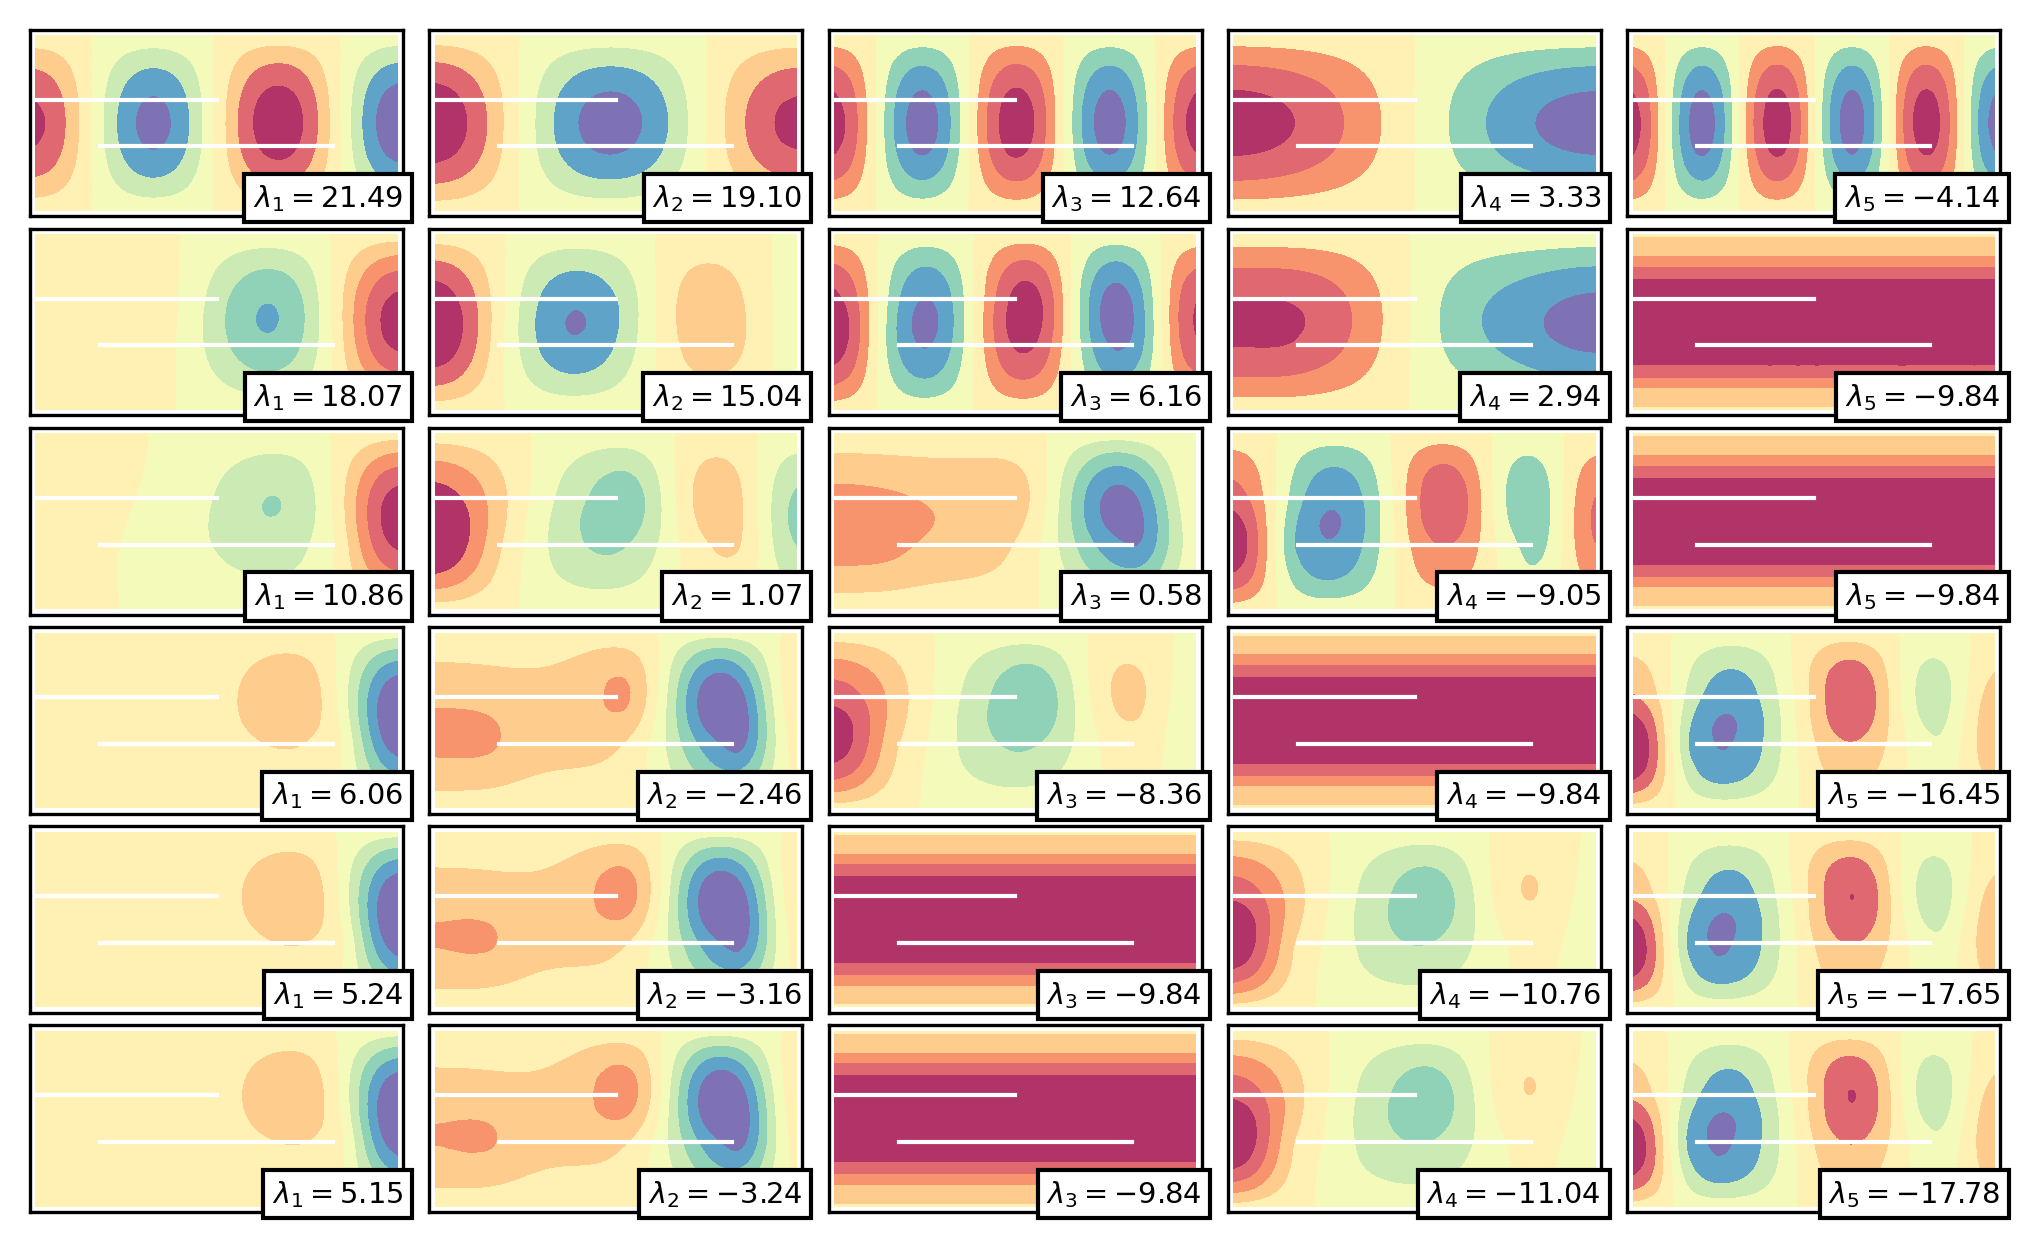

In [10]:
fig,axs = peig(pbs)
fig.savefig('../immagini/eig_bloccanti_C.png', **sf_kw|dict(pad_inches=0.05))

In [11]:
K_cr = 6.329205227151492e-16
pbs, tab = run(3, K_cr*2, K_cr*2 * np.logspace(-3, -8, 6))
tab_a += [ { 'scenario': 'D' } | row for row in tab ]

(292)  [21.11678629 18.88603294 12.07154983  3.31510853 -4.75432547]
(292)  [14.71242814 13.41236715  2.66509154  2.0038962  -9.83760121]
(297)  [  0.50151089  -0.51730067  -6.66729878  -9.83760167 -16.76561846]
(318)  [ -6.58624505  -9.28493836  -9.83760122 -14.70643661 -22.88191416]
(318)  [ -8.53840505  -9.83760119 -11.34422744 -15.79217512 -23.83278832]
(318)  [ -8.7895103   -9.83760119 -11.59947468 -15.90554919 -23.94837231]


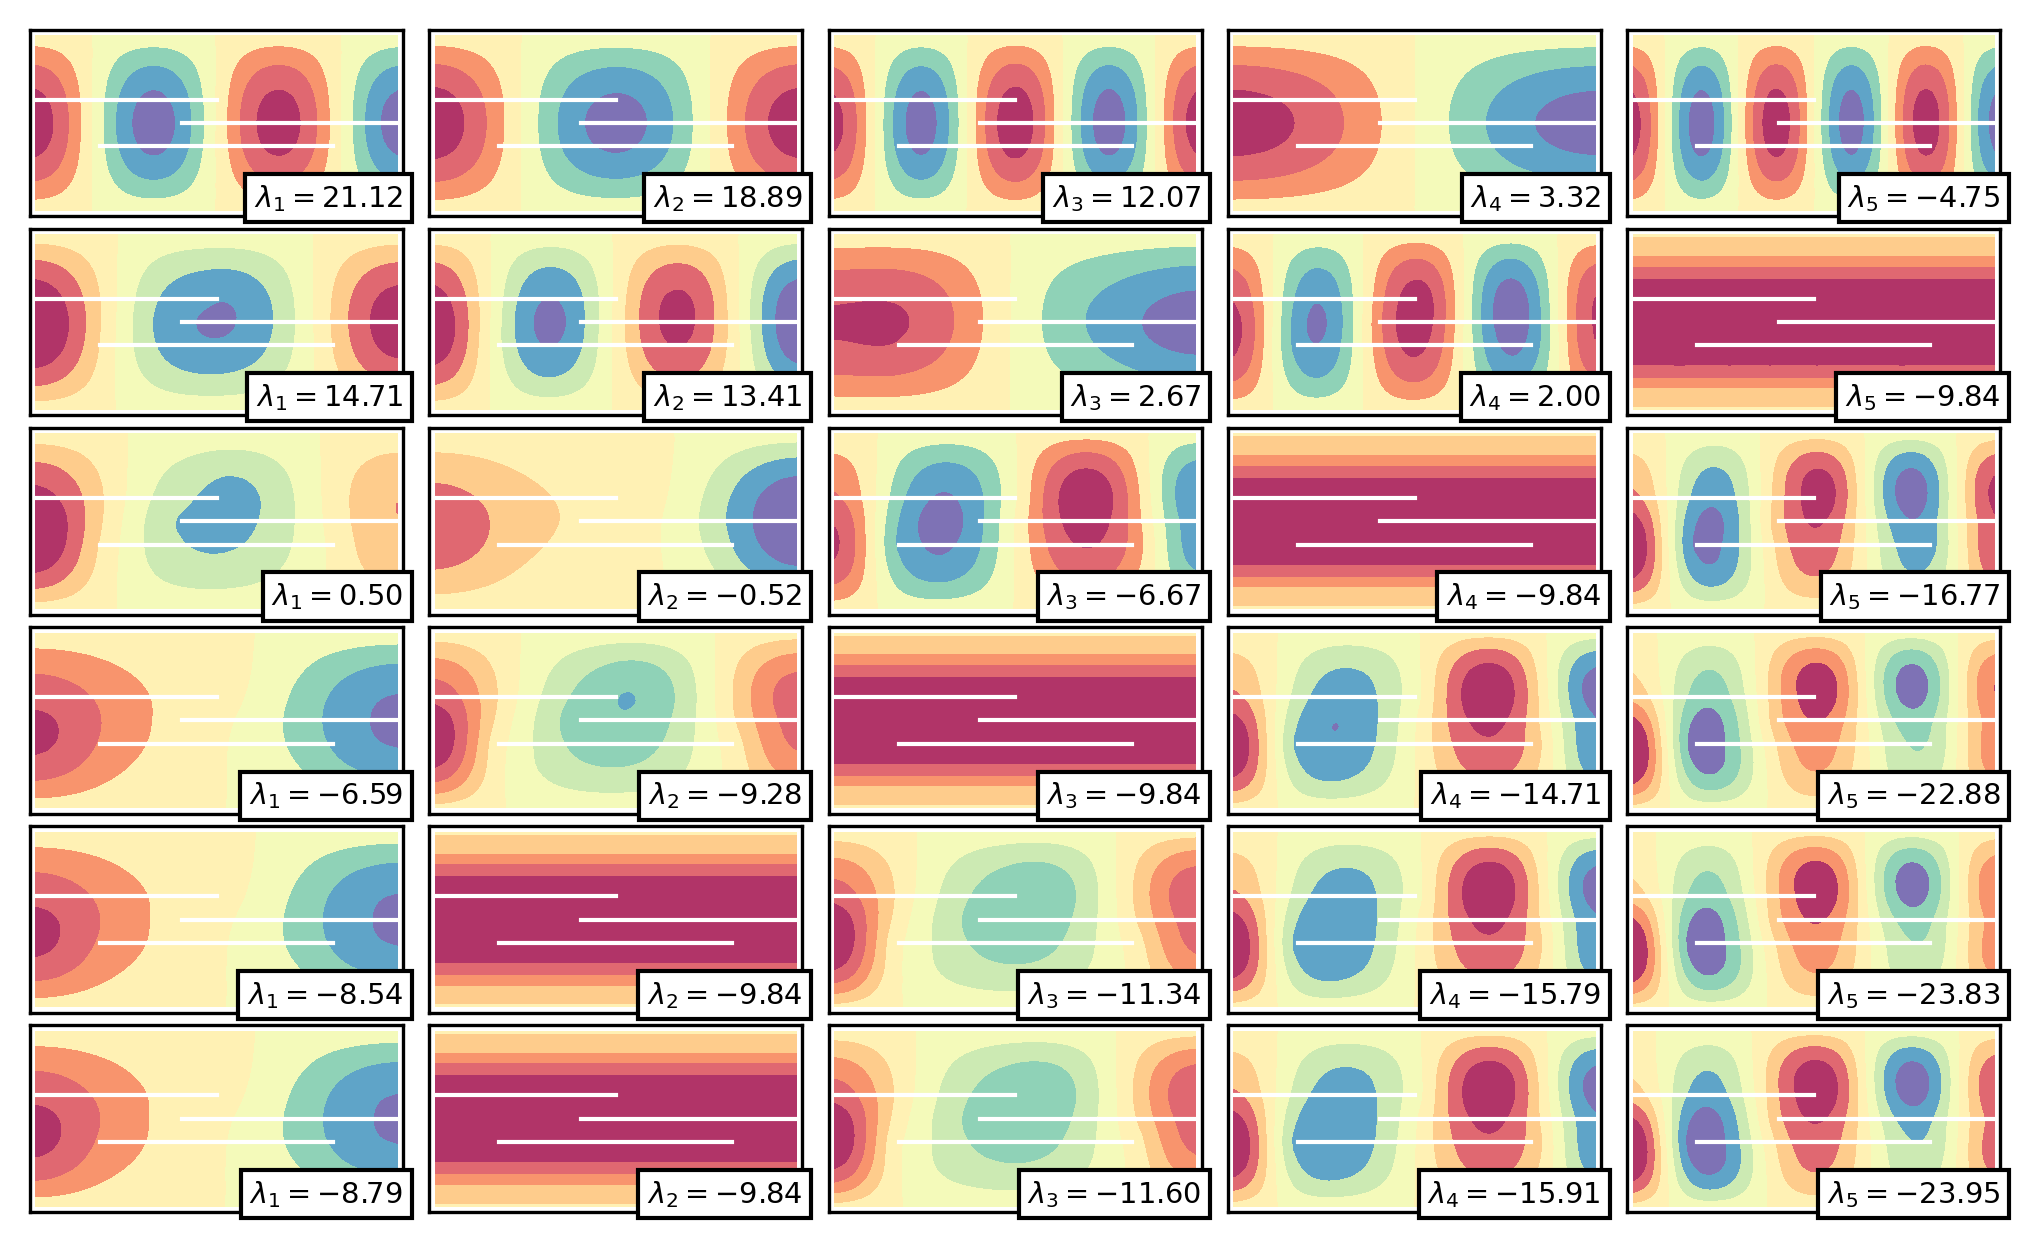

In [12]:
fig,axs = peig(pbs)
fig.savefig('../immagini/eig_bloccanti_D.png', **sf_kw|dict(pad_inches=0.05))

In [16]:
tab_b = [ row | { 'Ra/Ra_cr': row['Ra']/(4*np.pi**2), 'kf/km': row['kf']/row['km'] } for row in tab_a ]
print(tabulate(tab_b, headers='keys'))

scenario             km           kf       Ra         l1         l2          l3         l4         l5    Ra/Ra_cr    kf/km
----------  -----------  -----------  -------  ---------  ---------  ----------  ---------  ---------  ----------  -------
A           6.96213e-16  6.96213e-19  43.4627   1.73914   -2.37568    -3.69223    -9.83781  -14.797       1.10092   0.001
A           6.96213e-16  6.96213e-20  43.4627   0.995509  -3.54132    -4.31832    -9.83781  -16.9812      1.10092   0.0001
A           6.96213e-16  6.96213e-21  43.4627  -2.95544   -3.65228    -9.83781    -9.9031   -21.8694      1.10092   1e-05
A           6.96213e-16  6.96213e-22  43.4627  -3.66014   -8.0475     -9.83781   -12.8597   -23.7194      1.10092   1e-06
A           6.96213e-16  6.96213e-23  43.4627  -3.66097   -9.24337    -9.83781   -13.2811   -23.9812      1.10092   1e-07
A           6.96213e-16  6.96213e-24  43.4627  -3.66106   -9.379      -9.83781   -13.325    -24.009       1.10092   1e-08
B           1.26584e-

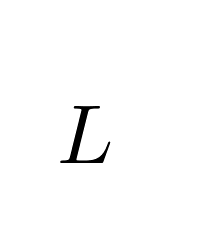

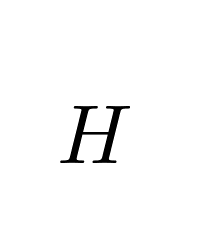

In [10]:
fig,ax = plt.subplots(figsize=(linewidth/30, linewidth/30)); ax.set_axis_off(); ax.text(0, 0, r'$ L $'); fig.savefig('L.pdf')
fig,ax = plt.subplots(figsize=(linewidth/30, linewidth/30)); ax.set_axis_off(); ax.text(0, 0, r'$ H $'); fig.savefig('H.pdf')
